

## Animal Care and Control Adopted Animals




**Objective:** know what will influence adoptions of animals, what feature probably will influence the stories of those animals.



In [1]:
#prepare the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
df=pd.read_csv('animal-data-1.csv')
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


### Data Processing

In [4]:
print('Data Shape',df.shape)
df.info()

Data Shape (10290, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10290 non-null  int64  
 1   intakedate        10290 non-null  object 
 2   intakereason      10288 non-null  object 
 3   istransfer        10290 non-null  int64  
 4   sheltercode       10290 non-null  object 
 5   identichipnumber  8324 non-null   object 
 6   animalname        10290 non-null  object 
 7   breedname         10245 non-null  object 
 8   basecolour        10290 non-null  object 
 9   speciesname       10290 non-null  object 
 10  animalage         10290 non-null  object 
 11  sexname           10290 non-null  object 
 12  location          10290 non-null  object 
 13  movementdate      10290 non-null  object 
 14  movementtype      10290 non-null  object 
 15  istrial           10289 non-null  float64
 16  returndate       

1. Seems we have some null data, including'intakereason','breedname' 'identichipnumber','returndate','returnedreason','deceaseddate'.

2. We have some date features but the type of data are object, these features should be specified as date objects to allow for easier feature engineering and analysis later on.

So I'll do two things here
* Fix the missing data
* Change the data type
* Remove the outliers

In [5]:
df['intakedate'] = pd.to_datetime(df.intakedate)
df['movementdate'] = pd.to_datetime(df.movementdate)
df['returndate'] = pd.to_datetime(df.returndate)
df['deceaseddate'] = pd.to_datetime(df.deceaseddate)

In [6]:
#Date features creations and deletions
df['year_take']=df.intakedate.dt.year
df['month_take']=df.intakedate.dt.month
df['day_take']=df.intakedate.dt.day

df['year_move']=df.movementdate.dt.year
df['month_move']=df.movementdate.dt.month
df['day_move']=df.movementdate.dt.day

After I changed data type, I checked the dataset and find out there are some 'Outliers' for the date columns, so I'm going to remove it to make plot looks better

In [7]:
df['year_take'].unique()
df.groupby('year_take').count()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,month_take,day_take,year_move,month_move,day_move
year_take,,,,,,,,,,,,,,,,,,,,,
2009,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
2012,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2013,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,4,4,4,4,4
2015,2,2,2,2,2,0,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2
2016,6,6,6,6,6,6,6,6,6,6,...,2,6,6,6,6,6,6,6,6,6
2017,3609,3609,3607,3609,3609,2927,3609,3586,3609,3609,...,107,3609,3609,3609,3609,3609,3609,3609,3609,3609
2018,4120,4120,4120,4120,4120,3393,4120,4105,4120,4120,...,149,4120,4120,4120,4120,4120,4120,4120,4120,4120
2019,2546,2546,2546,2546,2546,1991,2546,2539,2546,2546,...,68,2546,2546,2546,2546,2546,2546,2546,2546,2546


In [8]:
df['year_move'].unique()
df.groupby('year_move').count()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,year_take,month_take,day_take,month_move,day_move
year_move,,,,,,,,,,,,,,,,,,,,,
2013,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2016,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2017,3278,3278,3276,3278,3278,2625,3278,3255,3278,3278,...,107,3278,3278,3278,3278,3278,3278,3278,3278,3278
2018,4042,4042,4042,4042,4042,3331,4042,4027,4042,4042,...,140,4042,4042,4042,4042,4042,4042,4042,4042,4042
2019,2968,2968,2968,2968,2968,2366,2968,2961,2968,2968,...,79,2968,2968,2968,2968,2968,2968,2968,2968,2968


Seems we don't have much data before 2017 so I will just remove the data before that

In [9]:
df = df[df['year_take']>2016]
df = df[df['year_move']>2016]

About the NaN data, I cannot access all those data, so I will replace all the null data by 0 or 'missing'.
Normally when we missing the numerical data, we can replace it by the `mean()` or other things as prefered

In [11]:
df['identichipnumber']=df['identichipnumber'].fillna(0)
df['istrial']=df['istrial'].fillna(0)
df['intakereason'].fillna('missing',inplace=True)
df['breedname'].fillna('missing',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10275 entries, 15 to 10289
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10275 non-null  int64         
 1   intakedate        10275 non-null  datetime64[ns]
 2   intakereason      10275 non-null  object        
 3   istransfer        10275 non-null  int64         
 4   sheltercode       10275 non-null  object        
 5   identichipnumber  10275 non-null  object        
 6   animalname        10275 non-null  object        
 7   breedname         10275 non-null  object        
 8   basecolour        10275 non-null  object        
 9   speciesname       10275 non-null  object        
 10  animalage         10275 non-null  object        
 11  sexname           10275 non-null  object        
 12  location          10275 non-null  object        
 13  movementdate      10275 non-null  datetime64[ns]
 14  movementtype      102

### Feature Variables-Data Analytics

First I'm going to check what kind of animals they have the most, maybe Dog? or Cat?

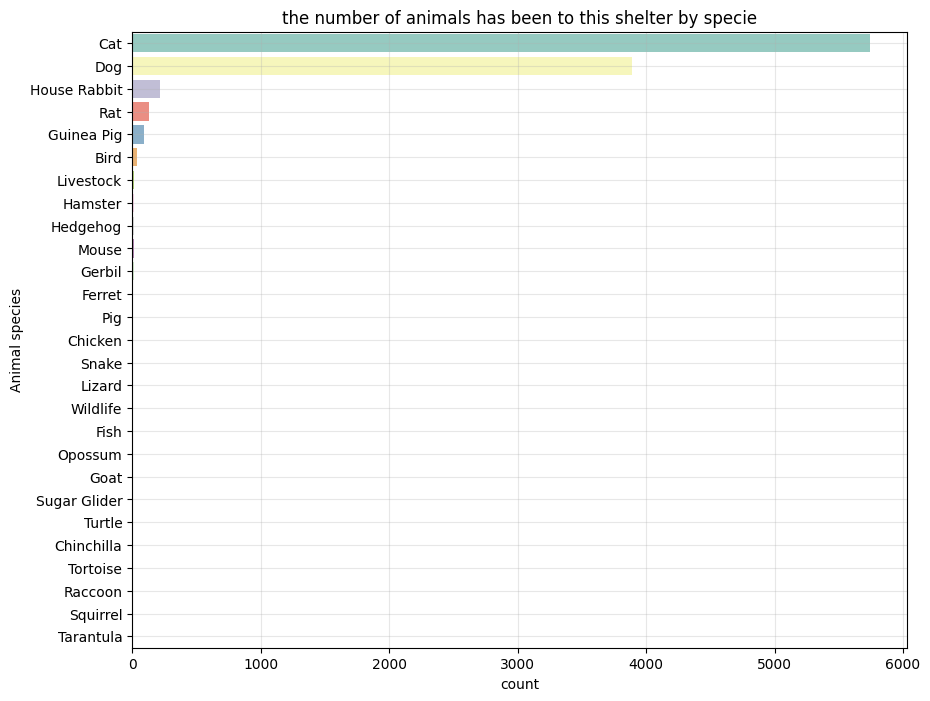

In [12]:
sp_count=pd.DataFrame(df.groupby(['speciesname'], as_index=False)['id'].count())

df1=pd.DataFrame({'speciesname':sp_count.speciesname,'count':sp_count.id})
df1=df1.sort_values(by=['count'],ascending=False)

plt.figure(figsize=(10,8))
ax=sns.barplot(x=df1['count'],y=df1['speciesname'],palette='Set3')

plt.ylabel('Animal species')
plt.xlabel('count')
plt.title('the number of animals has been to this shelter by specie')
plt.grid(alpha=0.3)

As we expect, the cat has the most number, followed by dogs. We also have rabbit, rat, guinea pig, bird which is also kinda popular in the shelthers.
The first question will be Why they are here? Is there any possible the speices will have some connection with the reason they are here?

First we can check why the aniamls came to the shelter:

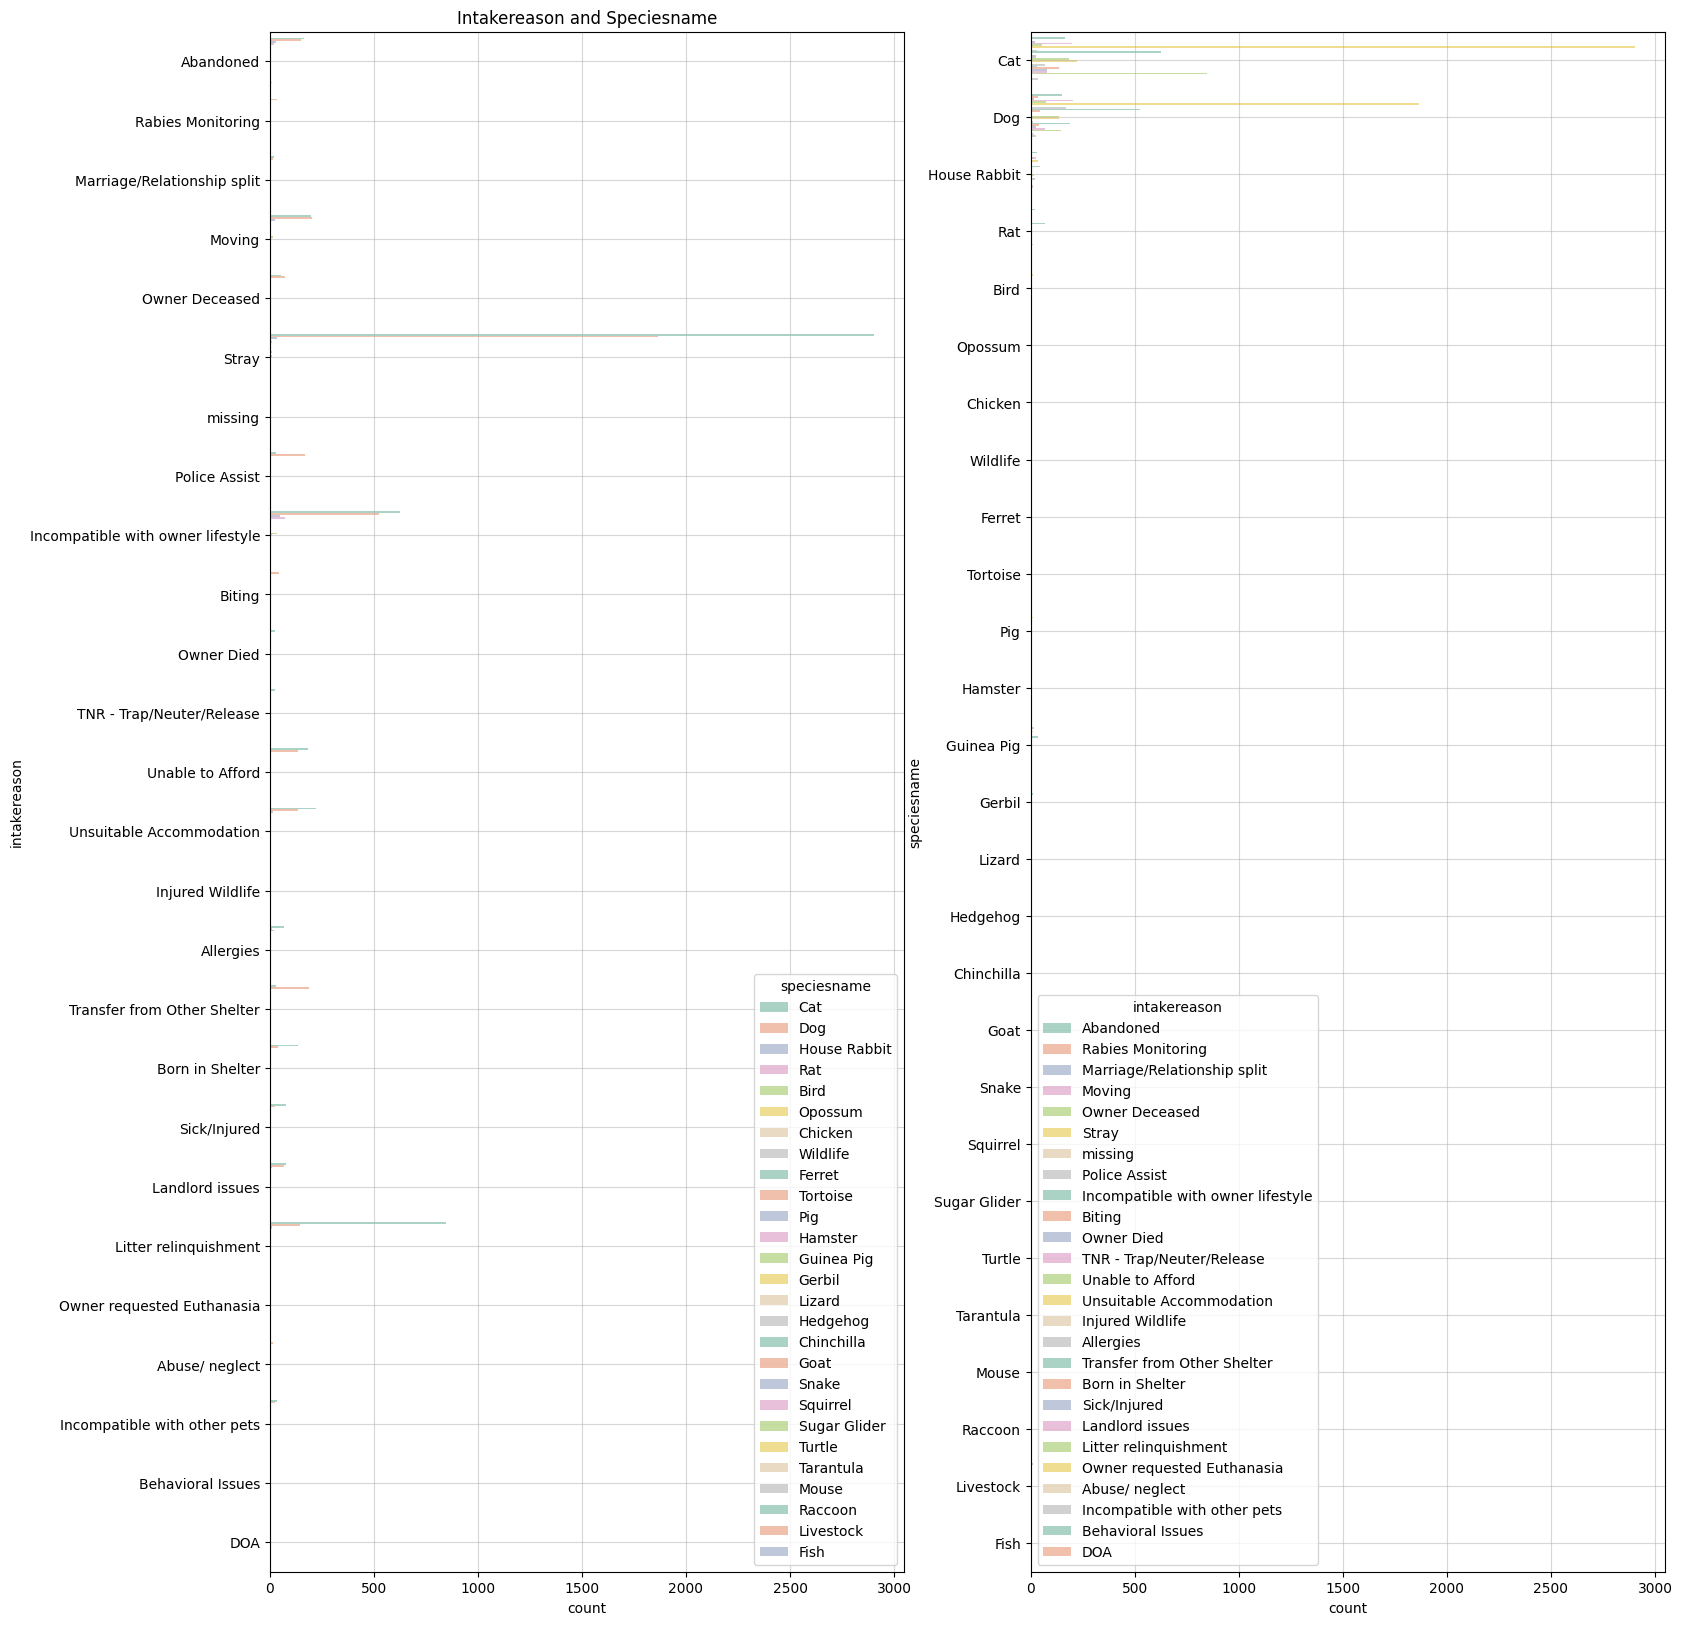

In [18]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,20))

sns.countplot(data=df, y='intakereason',hue='speciesname', ax=ax1,
              palette='Set2', alpha=0.6)
sns.countplot(data=df, y='speciesname',hue='intakereason', ax=ax2,
              palette='Set2', alpha=0.6)

ax1.set_title('Intakereason and Speciesname')
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
plt.show()

narrowing down to the two most common types: Cat and Dog

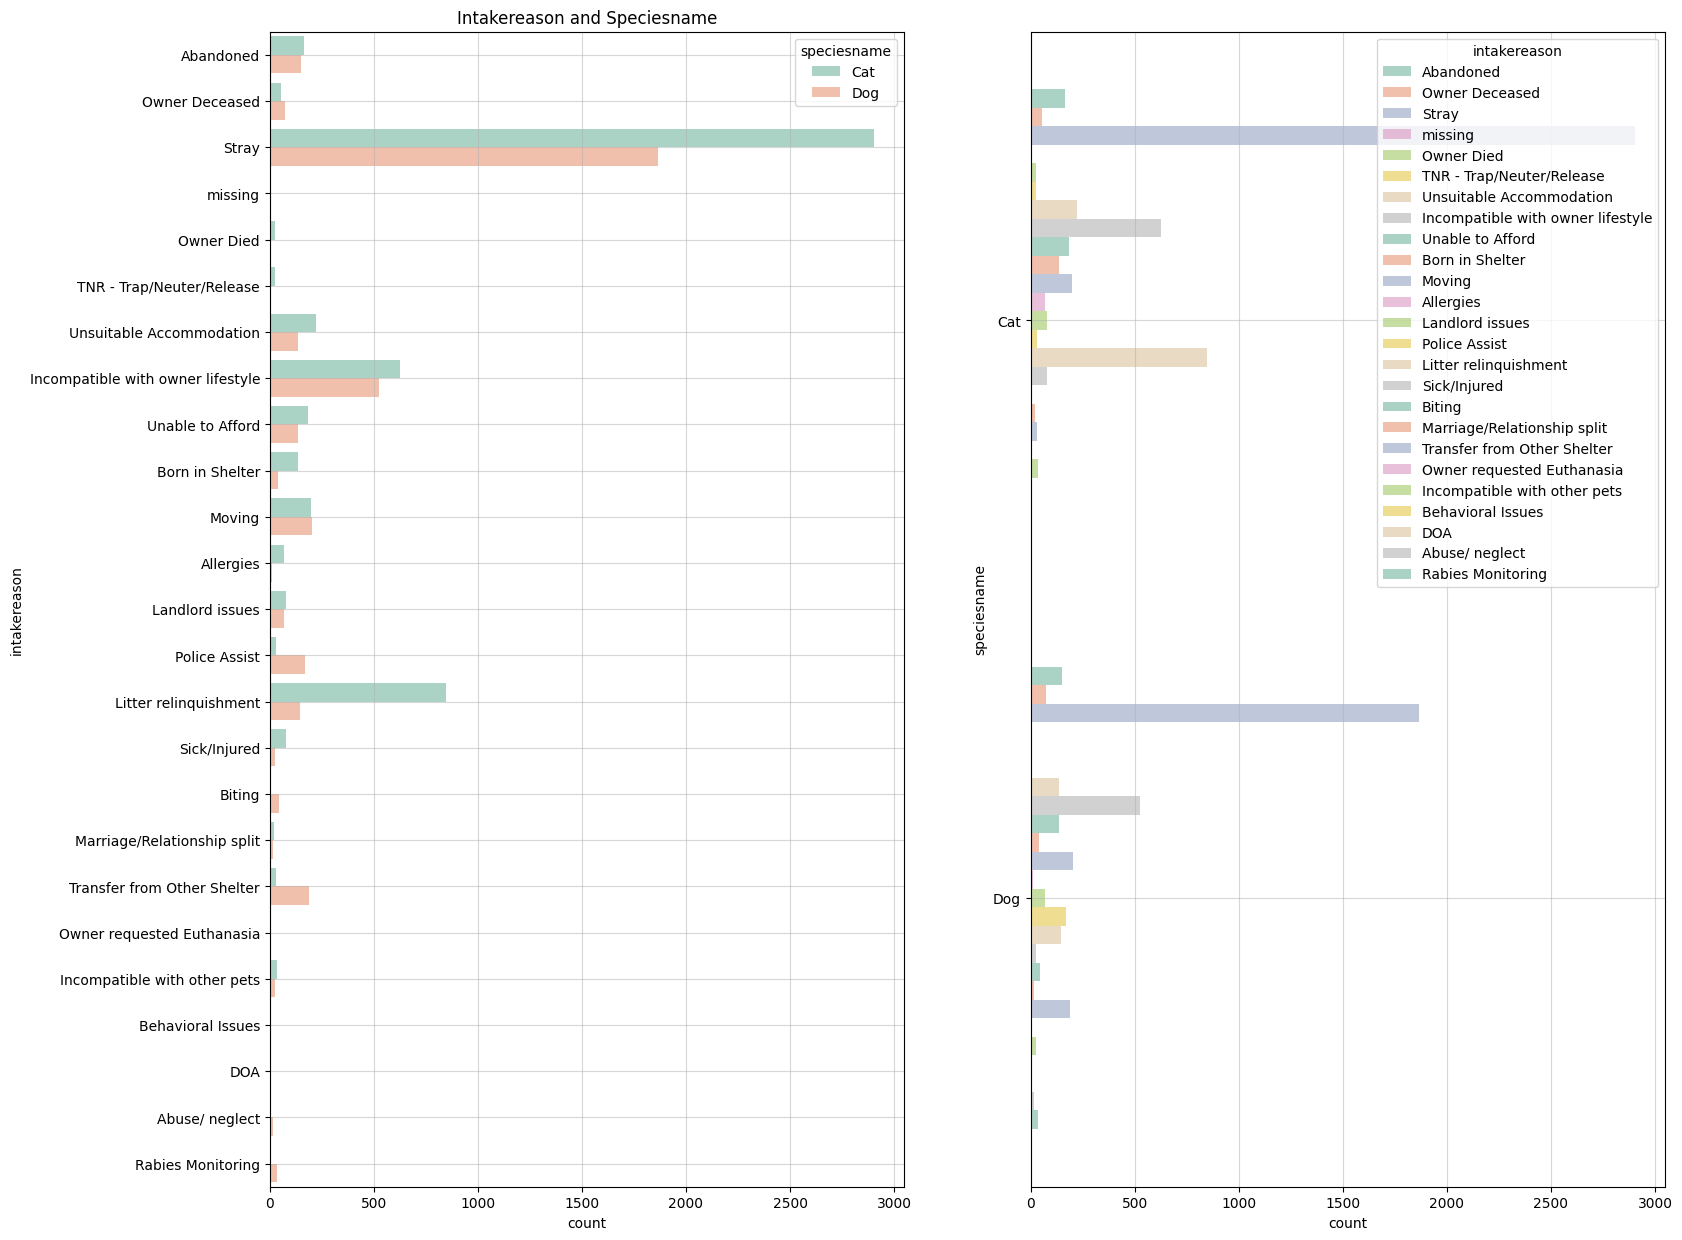

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,15))
x_cat=df.loc[(df['speciesname']=='Cat')]
x_dog=df.loc[(df['speciesname']=='Dog')]
#x_rabbit=df.loc[(df['speciesname']=='House Rabbit')]
df2=pd.concat([x_cat,x_dog])

sns.countplot(data=df2, y='intakereason',hue='speciesname', ax=ax1,
              palette='Set2', alpha=0.6)
sns.countplot(data=df2, y='speciesname',hue='intakereason', ax=ax2,
              palette='Set2', alpha=0.6)

ax1.set_title('Intakereason and Speciesname')
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
plt.show()

Next  compare some other things:
* Movementtype and Sexname
* Movementtype and Speciesname(top3)
* Movementtype and Age

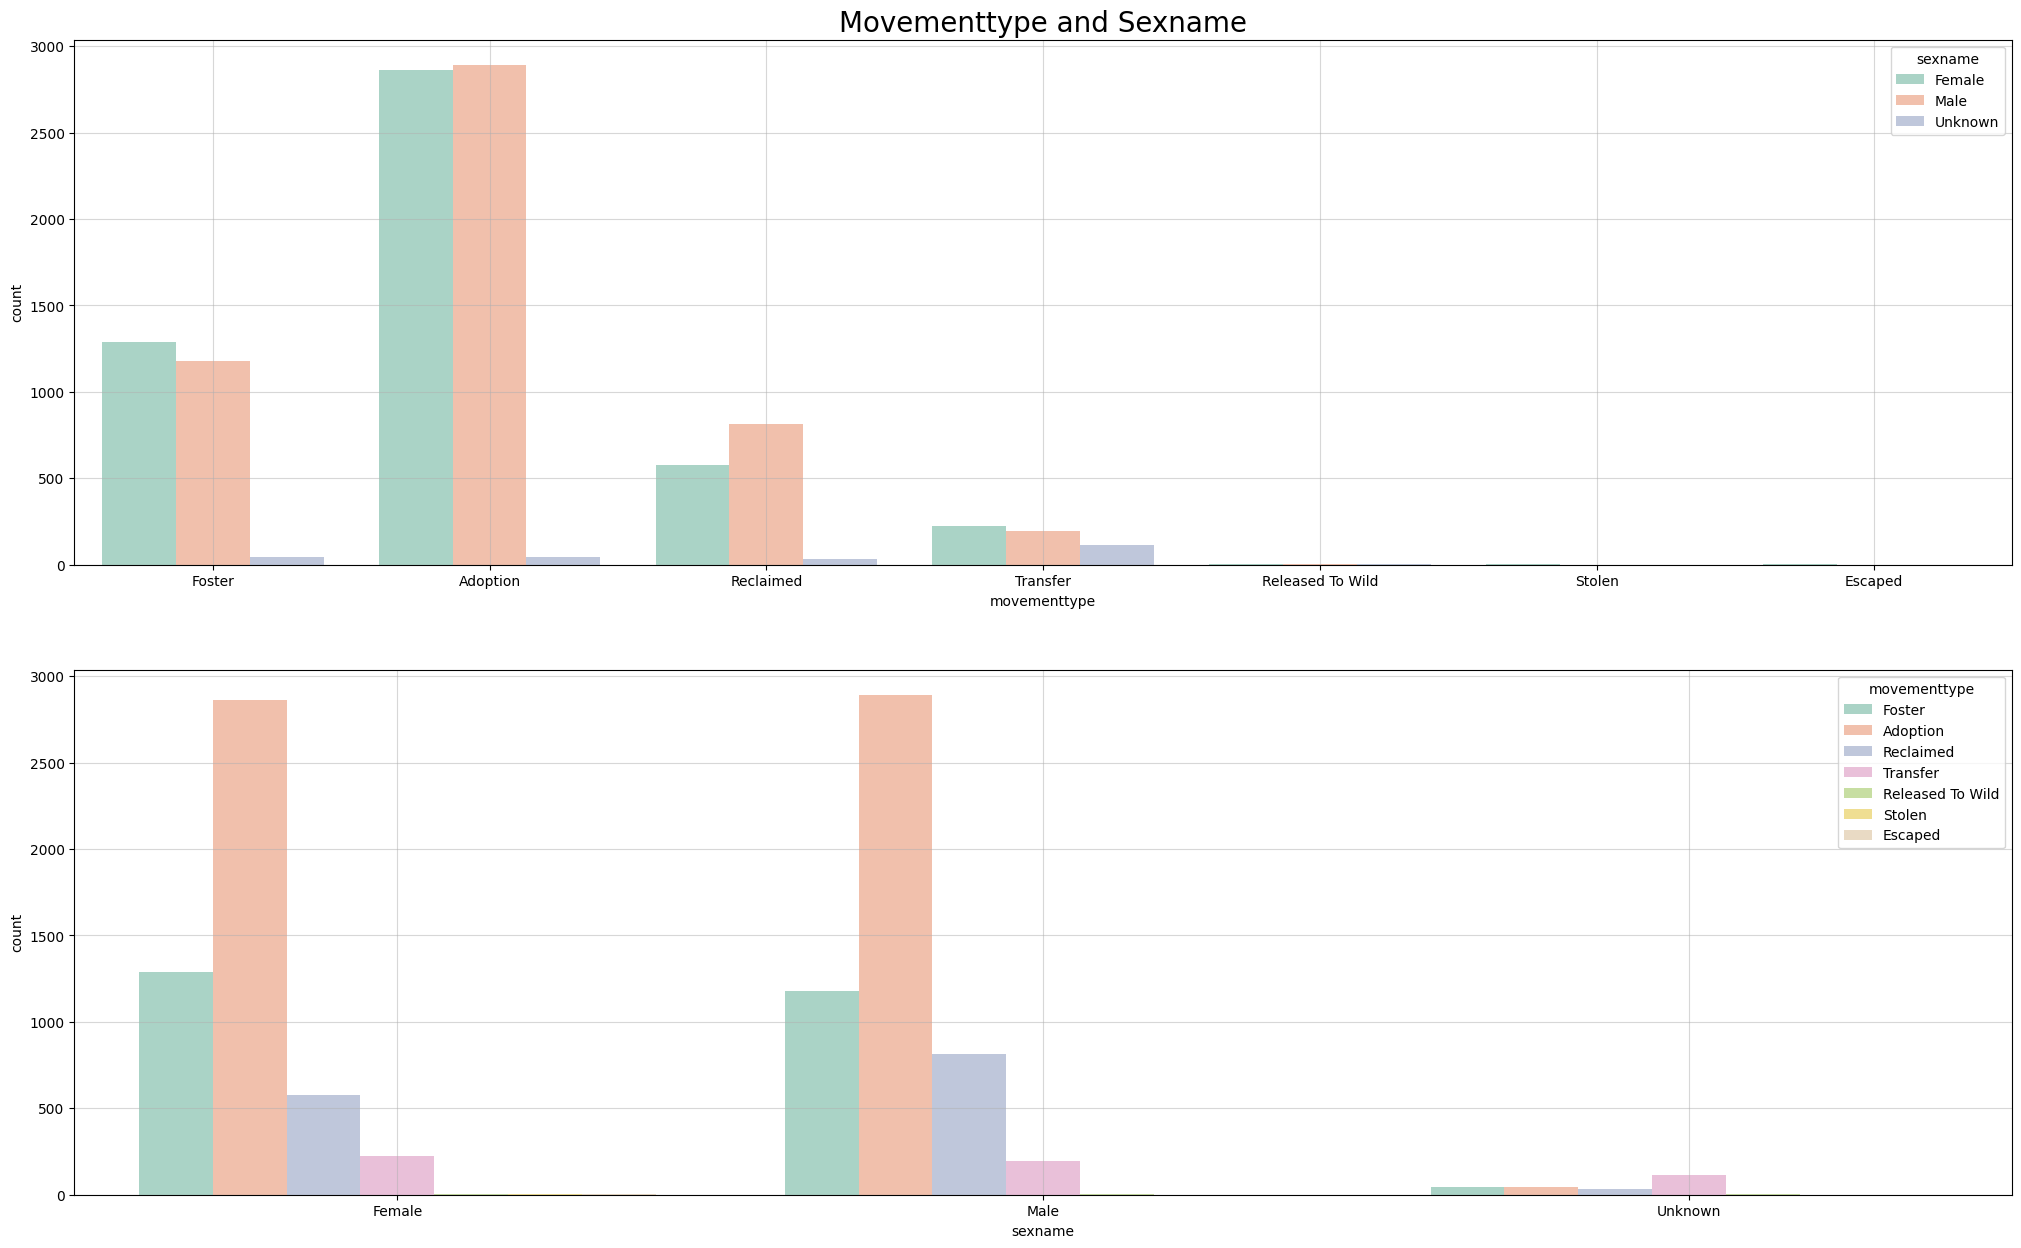

In [20]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(25, 15))
sns.countplot(data=df, x='movementtype',hue='sexname', ax=ax1,
              palette='Set2', alpha=0.6)
sns.countplot(data=df, x='sexname',hue='movementtype', ax=ax2,
              palette='Set2', alpha=0.6)

ax1.set_title('Movementtype and Sexname',fontsize=20)
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
plt.show()

Seems all values are close to each other, but male reclaimed is little bit more than female reclaimed.

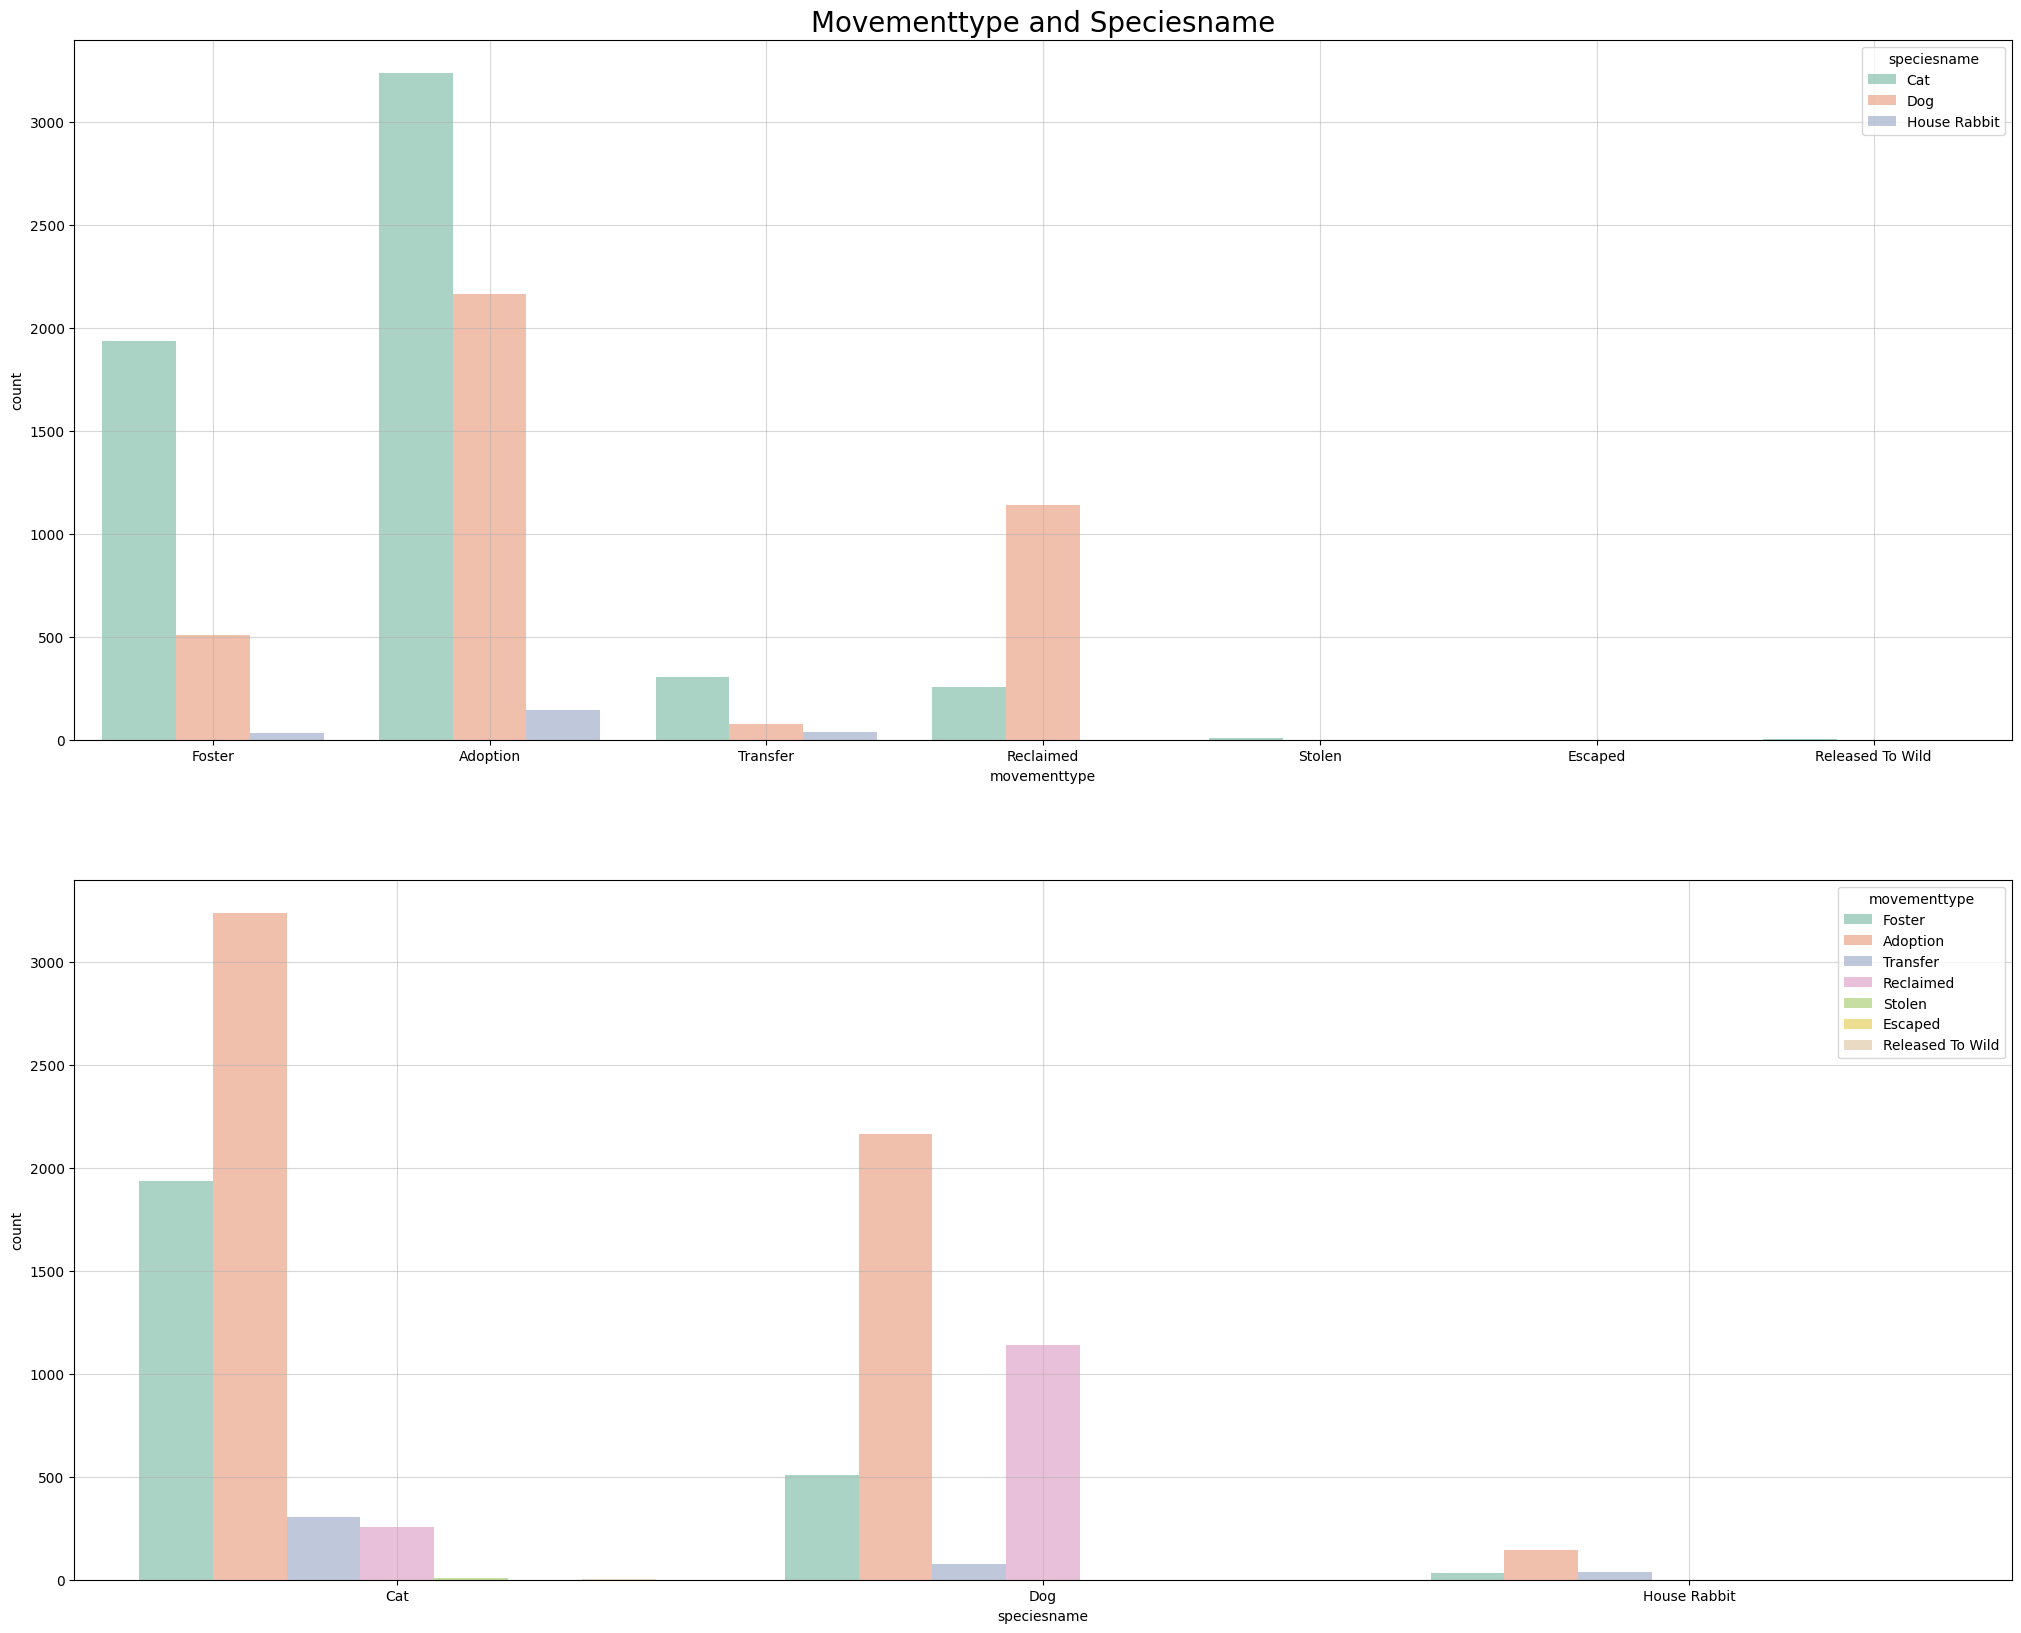

In [21]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(25,20))

x_rabbit=df.loc[(df['speciesname']=='House Rabbit')]
df2=pd.concat([x_cat,x_dog,x_rabbit])

sns.countplot(data=df2, x='movementtype',hue='speciesname', ax=ax1,
              palette='Set2', alpha=0.6)
sns.countplot(data=df2, x='speciesname',hue='movementtype', ax=ax2,
              palette='Set2', alpha=0.6)

ax1.set_title('Movementtype and Speciesname',fontsize=20)
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
plt.show()

Next I will put all the age in a same range and to check the distribution
I used doube x-aixs plot too see the distribution and total count of different age

<ipython-input-22-7775e5ec7028>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(df['age'],color="g")
<ipython-input-22-7775e5ec7028>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(df.age, bins = 60, kde=False)


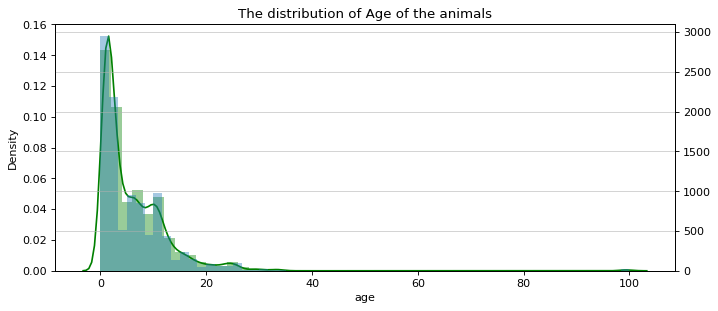

In [22]:
df['age']=df['animalage'].str.split(' ',expand=True)[0]

plt.figure(figsize=(10,4), dpi= 80)
ax1=sns.distplot(df['age'],color="g")

ax2 = ax1.twinx()
ax2=sns.distplot(df.age, bins = 60, kde=False)

plt.title('The distribution of Age of the animals')
plt.grid(alpha=.6)
plt.show()

In [23]:
def calc_age_category(x):
    x = float(x)
    if x < 3.: return 'young'
    if x < 5.: return 'young adult'
    if x < 10.: return 'adult'
    return 'old'
df['AgeCategory'] = df.age.apply(calc_age_category)

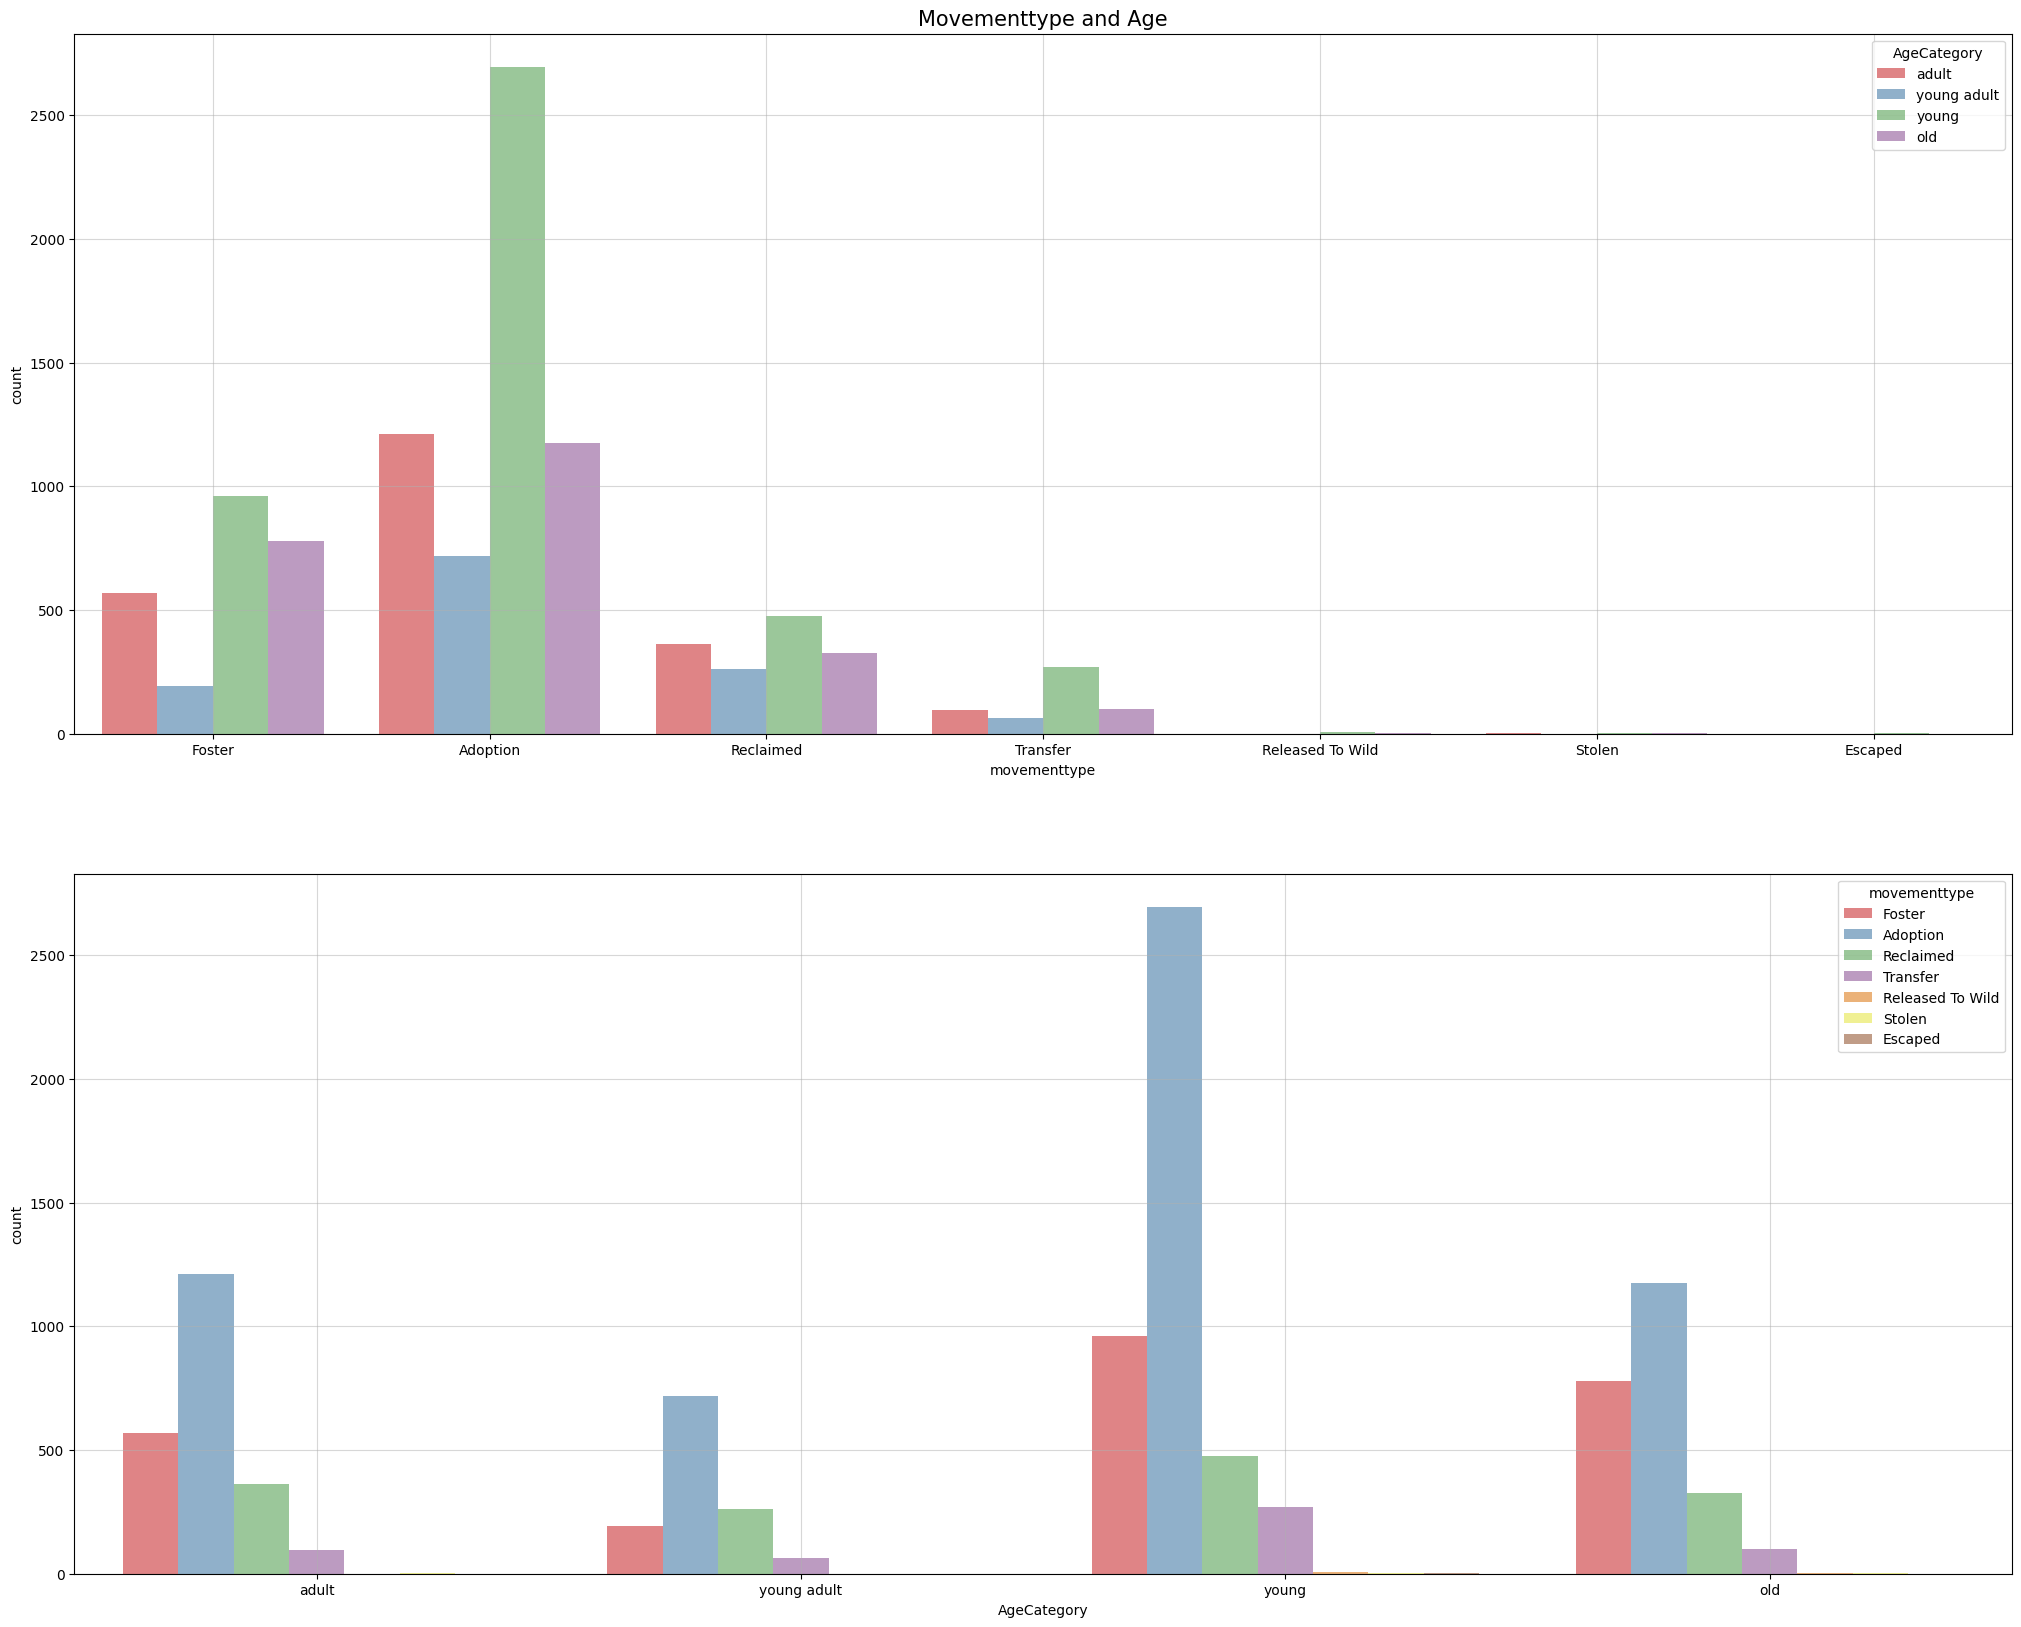

In [25]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(25,20))
sns.countplot(data=df, x='movementtype',hue='AgeCategory', ax=ax1,
             palette='Set1', alpha=0.6)
sns.countplot(data=df, x='AgeCategory',hue='movementtype', ax=ax2,
             palette='Set1', alpha=0.6)

ax1.set_title('Movementtype and Age',fontsize=15)
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
plt.show()

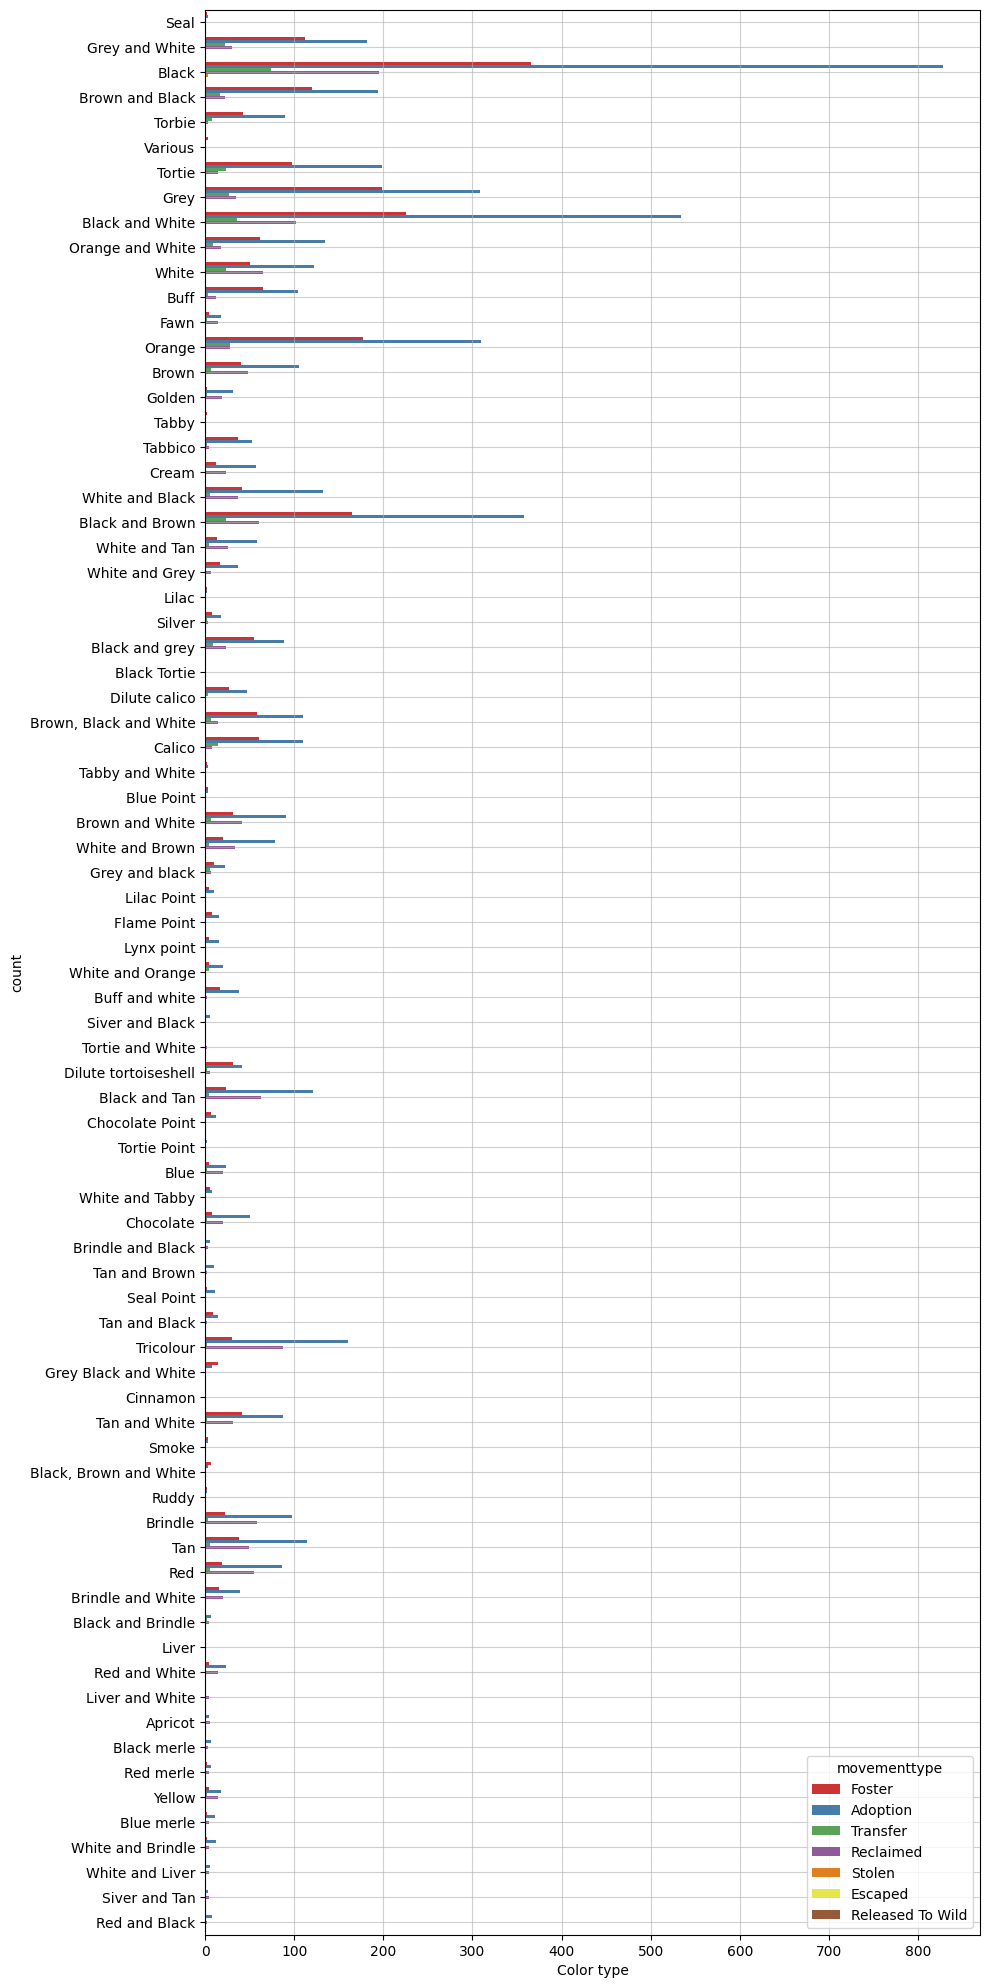

In [26]:
plt.figure(figsize=(10,25))
sns.countplot(data=df2, y='basecolour',hue='movementtype', palette='Set1')

plt.xlabel('Color type')
plt.ylabel('count')
plt.grid(alpha=0.6)
plt.show()

Seems black base colour has the most number and has been adopted the most, also orange cat are kinda popluar, the ratio between adoptiona and forester are all around 2:1

Time series:

Will the month influence the intake number of the pets?

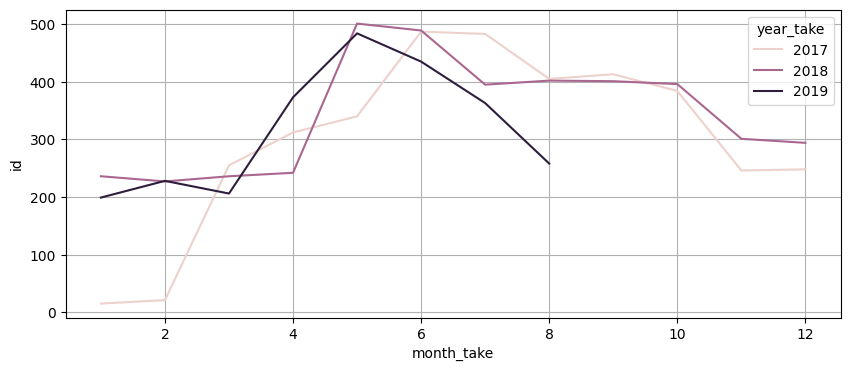

In [27]:
group_year=df.groupby(['month_take','year_take'],as_index=False).count()

plt.figure(figsize=(10,4))
sns.lineplot(x="month_take",y='id', hue='year_take', data=group_year)
plt.grid()
plt.show()

Seems everyyear during spring time the shelter will have more intake animals, probably because that is the time the aniamls give birth, which will cause the increasing number of it.

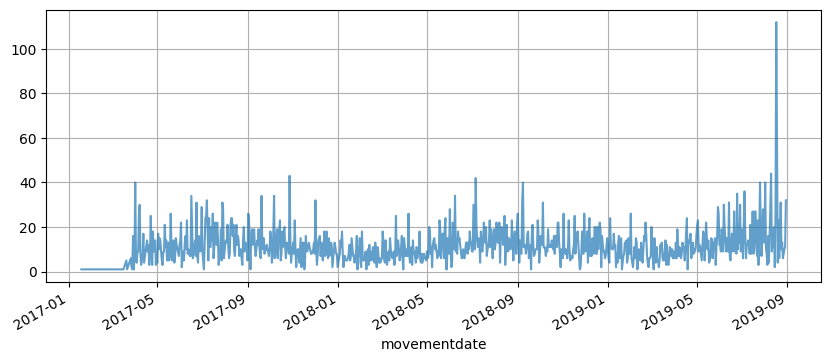

In [28]:
plt.figure(figsize=(10,4))
df['movementtype'].groupby(df['movementdate']).count().plot(kind="line",alpha=.7)
plt.grid()
plt.show()

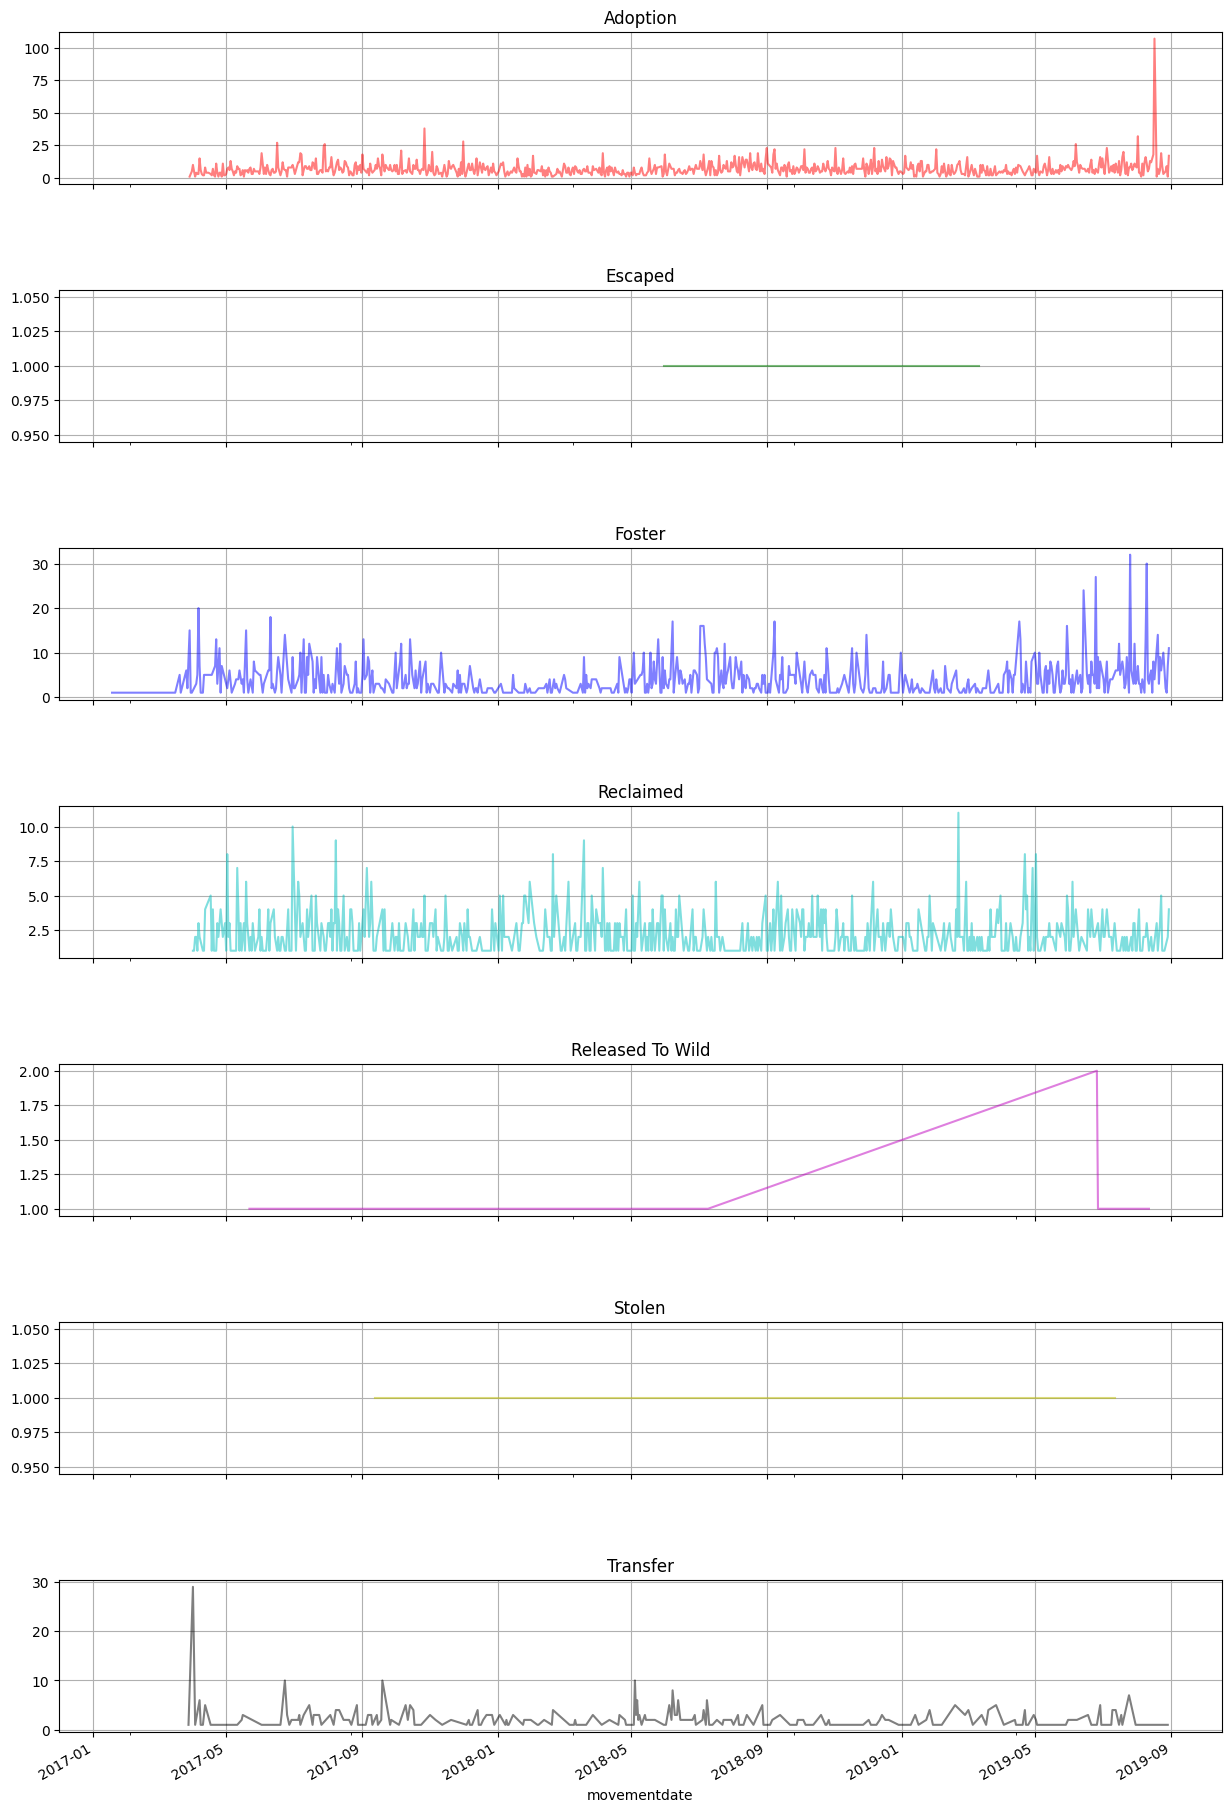

In [29]:
#For each outcome
monthGroup=df['movementdate'].groupby(df['movementtype'])

plt.subplots(7, 1, figsize=(15,25), sharex=True)
plt.subplots_adjust(hspace=0.7)
colors = list('rgbcmyk')
for i, (_, g) in enumerate(monthGroup):
    plt.subplot(7,1,i+1)
    plt.title(_)
    g.groupby(df["movementdate"]).count().plot(kind="line",
                                               color=colors[i],grid=True,alpha=.5)

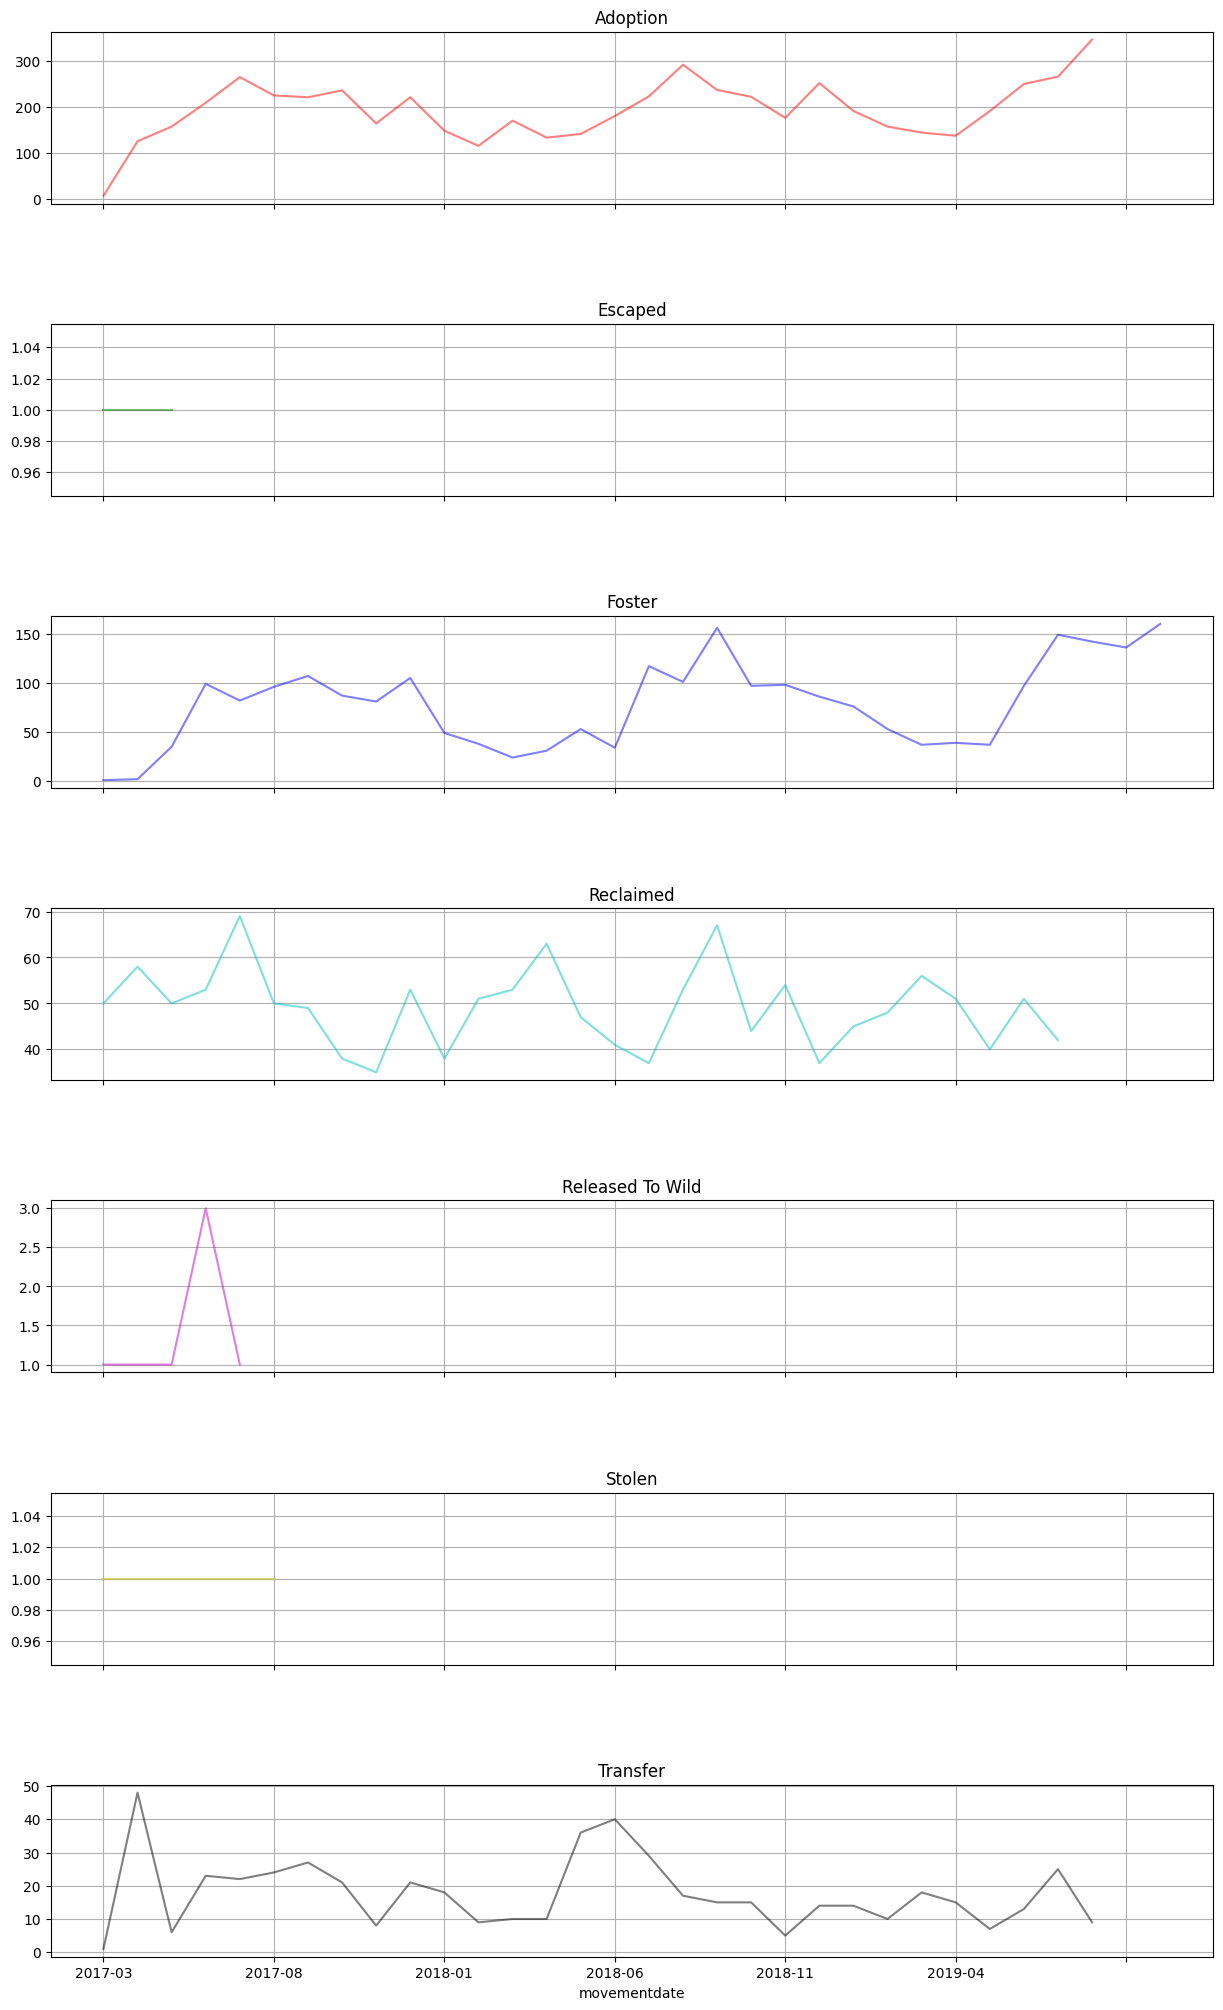

In [30]:
#Monthly time series
df_ym=df.movementdate.map(lambda x: x.strftime('%Y-%m'))
df_ym_move = df_ym.groupby(df["movementtype"])

plt.subplots(7, 1, figsize=(15, 25), sharex=True)
plt.subplots_adjust(hspace=0.7)
colors = list('rgbcmyk')
for i, (_, g) in enumerate(df_ym_move):
    plt.subplot(7,1,i+1)
    plt.title(_)
    g.groupby(df_ym).count().plot(kind="line", color=colors[i],
                                  grid=True,alpha=.5)

In [31]:
df_heat=df.drop(columns=['intakedate','movementdate','id','identichipnumber',
                         'animalname','animalage','returndate','returnedreason',
                         'deceaseddate','deceasedreason',
                        'year_take','month_take','day_take',
                        'year_move','month_move','day_move',
                        'diedoffshelter','isdoa'])

le_sp = preprocessing.LabelEncoder()
df_heat.speciesname = le_sp.fit_transform(df_heat.speciesname)

le_take = preprocessing.LabelEncoder()
df_heat.intakereason = le_take.fit_transform(df_heat.intakereason)

le_breed = preprocessing.LabelEncoder()
df_heat.breedname = le_breed.fit_transform(df_heat.breedname)

le_color = preprocessing.LabelEncoder()
df_heat.basecolour = le_color.fit_transform(df_heat.basecolour)

le_sex = preprocessing.LabelEncoder()
df_heat.sexname = le_sex.fit_transform(df_heat.sexname)

le_loc = preprocessing.LabelEncoder()
df_heat.location = le_loc.fit_transform(df_heat.location)

le_move = preprocessing.LabelEncoder()
df_heat.movementtype = le_move.fit_transform(df_heat.movementtype)

le_age = preprocessing.LabelEncoder()
df_heat.AgeCategory = le_age.fit_transform(df_heat.AgeCategory)

List the numerical features in decending order by their correlation with trip_duration:

location: 0.31993183643719864
speciesname: 0.11484929730230421
sexname: 0.10759601669266244
istransfer: -0.03548013438292686
puttosleep: 0.03166189332620616
breedname: 0.02882697209835889
basecolour: 0.024256871363682233
istrial: nan
AgeCategory: -0.021518608903846673


<ipython-input-32-d12758b3f4c4>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_heat.corr()
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-32-d12758b3f4c4>:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_l

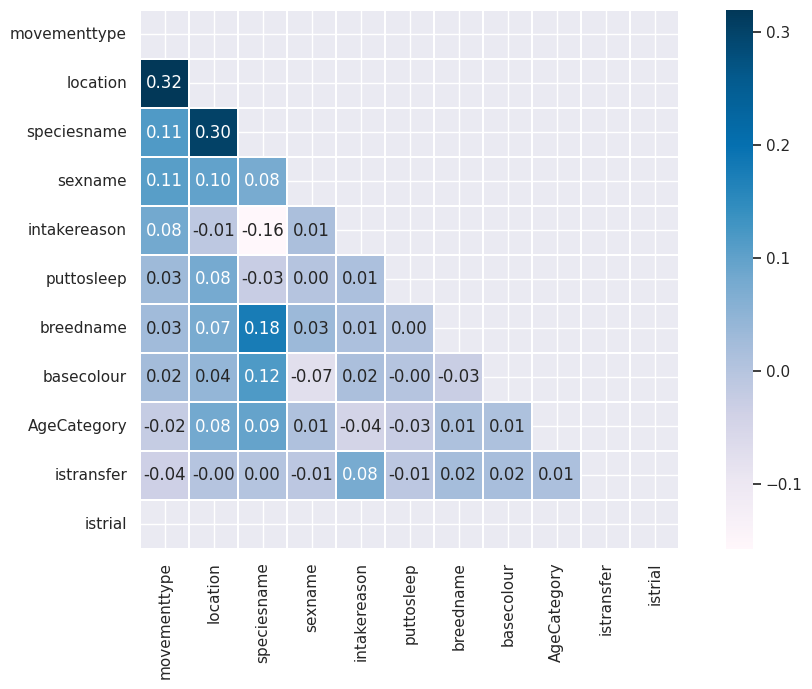

In [32]:
# Correlations to trip_duration
corr = df_heat.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
cor_dict = corr['movementtype'].to_dict()
del cor_dict['movementtype']
print("List the numerical features in decending order by their correlation with trip_duration:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: {1}".format(*ele))

# Correlation matrix heatmap
corrmat = df_heat.corr()
plt.figure(figsize=(12, 7))

# Number of variables for heatmap
k = 50000
cols = corrmat.nlargest(k, 'movementtype')['movementtype'].index
cm = np.corrcoef(df_heat[cols].values.T)

# Generate mask for upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
sns.heatmap(cm, mask=mask, cbar=True, annot=True, square=True,\
                 fmt='.2f',annot_kws={'size': 12}, yticklabels=cols.values,\
                 xticklabels=cols.values, cmap = 'PuBu',lw = .1)

plt.show()

That actually is good, it means people will adopt animals regardless their age, breed etc things.